<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [8640]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import plotly.express as px


In [8641]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
pd.set_option('display.max_columns', None)
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [8642]:
print(os.getcwd())

C:\Users\Djamel\Projet_6


In [8643]:

warnings.filterwarnings('ignore')

# Importation du fichier web.xlsx
df_web = pd.read_excel("web.xlsx")

# Importation du fichier erp.xlsx
df_erp = pd.read_excel("erp.xlsx")

# Importation du fichier liaison.xlsx
df_liaison = pd.read_excel("liaison.xlsx")


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [8644]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [8645]:
print(df_erp.columns)


Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status',
       'purchase_price'],
      dtype='object')


In [8646]:
#Consulter le nombre de colonnes
nombre_de_colonnes = df_erp.shape[1]
print("Le tableau comporte {} colonne(s)".format(nombre_de_colonnes))
#La nature des données dans chacune des colonnes
df_erp.info()

#Le nombre de valeurs présentes dans chacune des colonnes
print(df_erp.count())


Le tableau comporte 6 colonne(s)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 38.8+ KB
product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
purchase_price    825
dtype: int64


In [8647]:
#Afficher les 5 premières lignes de la table
print(df_erp.head(5))

   product_id  onsale_web  price  stock_quantity stock_status  purchase_price
0        3847           1   24.2              16      instock           12.88
1        3849           1   34.3              10      instock           17.54
2        3850           1   20.8               0   outofstock           10.64
3        4032           1   14.1              26      instock            6.92
4        4039           1   46.0               3   outofstock           23.77


In [8648]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
duplicates = df_erp.duplicated(subset=['product_id'])
print("Nombre de lignes en double dans la colonne 'product_id' :", duplicates.sum())

Nombre de lignes en double dans la colonne 'product_id' : 0


In [8649]:
#Afficher les valeurs distinctes de la colonne stock_status
print(df_erp['stock_status'].unique())
#À quelle(s) autre(s) colonne(s) sont-elles liées ?
from scipy.stats import chi2_contingency

# Pour chaque colonne catégorielle dans le DataFrame
for column in df_erp.select_dtypes(include=['object']).columns:
    # Créer un tableau de contingence
    contingency_table = pd.crosstab(df_erp['stock_status'], df_erp[column])
    # Effectuer le test du chi-carré
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # Afficher les résultats
    print(f"Colonne : {column}, Chi2 : {chi2}, p-valeur : {p}")

['instock' 'outofstock']
Colonne : stock_status, Chi2 : 814.937965793096, p-valeur : 3.0501112149339855e-179


In [8650]:
#Création d'une colonne "stock_status_2
df_erp['stock_status_2'] = df_erp['stock_status'].apply(lambda x: 'instock' if x == 'instock' else 'outofstock')
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
df_erp['stock_status_2'] = df_erp['stock_quantity'].apply(lambda x: 'instock' if x > 0 else 'outofstock')

#si la valeur de la colonne "stock_quantity" est nulle ou negatif renseigner "outofstock" sinon mettre "instock"
df_erp['stock_status_2'] = df_erp['stock_quantity'].apply(lambda x: 'outofstock' if x <= 0 else 'instock')

In [8651]:
#Vérifions que les 2 colonnes sont identiques:
are_columns_equal = df_erp['stock_status'].equals(df_erp['stock_status_2'])
print("Les colonnes sont-elles identiques ? :", are_columns_equal)
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2

#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
are_rows_equal = df_erp['stock_status'] == df_erp['stock_status_2']
print(are_rows_equal)
#C'est un bon début, mais difficile à exploiter

Les colonnes sont-elles identiques ? : False
0       True
1       True
2       True
3       True
4      False
       ...  
820     True
821     True
822     True
823     True
824     True
Length: 825, dtype: bool


In [8652]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset
total_identical_rows = (df_erp['stock_status'] == df_erp['stock_status_2']).sum()
print("Nombre total de lignes identiques :", total_identical_rows)

Nombre total de lignes identiques : 823


In [8653]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3

non_identical_rows = df_erp[df_erp['stock_status_2'] != df_erp['stock_status']]
print(non_identical_rows)


     product_id  onsale_web  price  stock_quantity stock_status  \
4          4039           1   46.0               3   outofstock   
398        4885           1   18.7               0      instock   

     purchase_price stock_status_2  
4             23.77        instock  
398            9.66     outofstock  


In [8654]:
#Corriger la ou les données incohérentes
# Identifier les lignes incohérentes
inconsistent_rows = df_erp['stock_status'] != df_erp['stock_status_2']

# Copier les valeurs de 'stock_status_2' dans 'stock_status' pour ces lignes
df_erp.loc[inconsistent_rows, 'stock_status_2'] = df_erp.loc[inconsistent_rows, 'stock_status']

#Verification en utilisant le même code que plus haut pour afficher les problemes

# Identifier les lignes incohérentes
#non_identical_rows = df_erp[df_erp['stock_status'] != df_erp['stock_status_2']]
print(non_identical_rows)

     product_id  onsale_web  price  stock_quantity stock_status  \
4          4039           1   46.0               3   outofstock   
398        4885           1   18.7               0      instock   

     purchase_price stock_status_2  
4             23.77        instock  
398            9.66     outofstock  


In [8655]:
#nettoyer df_erp 
# Supprimer les doublons
df_erp = df_erp.drop_duplicates(subset=['product_id'])


# Supprimer les NaN et les cellules vides
df_erp = df_erp.replace('', np.nan).dropna(subset=['product_id'])


# Supprimer les cellules qui sont des chaînes de caractères
# Pour 'product_id' dans df_erp
df_erp = df_erp[pd.to_numeric(df_erp['product_id'], errors='coerce').notnull()]


# Nombre de lignes dans df_erp
num_rows_erp = df_erp.shape[0]
print("Nombre de lignes dans df_erp :", num_rows_erp)

Nombre de lignes dans df_erp : 825


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [8656]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
# Vérifier les prix non renseignés
non_renseignes = df_erp['price'].isna().sum()
print("Nombre de prix non renseignés :", non_renseignes)

# Vérifier les prix négatifs
negatifs = (df_erp['price'] < 0).sum()
print("Nombre de prix négatifs :", negatifs)

# Vérifier les prix nuls
nuls = (df_erp['price'] == 0).sum()
print("Nombre de prix nuls :", nuls)
#Afficher le ou les prix non renseignés dans la colonne "price"
print("Nombres d'article avec un prix non renseignés: {}".format(df_erp['price'].isna().sum()))#Saisir l'instruction manquante dans la fonction format
#Afficher le prix minimum de la colonne "price"
min_price = df_erp['price'].min()
print("Le prix minimum est :", min_price)
#Afficher le prix maximum de la colonne "price"
max_price = df_erp['price'].max()
print("Le prix maximum est :", max_price)
#Affichier les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)
negative_prices = df_erp[df_erp['price'] < 0]
print(negative_prices)

# Prendre la valeur absolue du prix
##df_erp['price'] = df_erp['price'].abs()

# Ou supprimer les lignes avec des prix négatifs
##df_erp = df_erp[df_erp['price'] >= 0]

# Ou remplacer les prix négatifs par la médiane
##median_price = df_erp['price'].median()
##df_erp.loc[df_erp['price'] < 0, 'price'] = median_price

Nombre de prix non renseignés : 0
Nombre de prix négatifs : 3
Nombre de prix nuls : 0
Nombres d'article avec un prix non renseignés: 0
Le prix minimum est : -20.0
Le prix maximum est : 225.0
     product_id  onsale_web  price  stock_quantity stock_status  \
151        4233           0  -20.0               0   outofstock   
469        5017           0   -8.0               0   outofstock   
739        6594           0   -9.1              19      instock   

     purchase_price stock_status_2  
151           10.33     outofstock  
469            4.34     outofstock  
739            4.61        instock  


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [8657]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
min_quantity = df_erp['stock_quantity'].min()
print(min_quantity)
#Afficher la quantité maximum de la colonne "stock_quantity"
max_quantity = df_erp['stock_quantity'].max()
print(max_quantity)
#Affichier les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)
negative_stocks = df_erp[df_erp['stock_quantity'] < 0]
print(negative_stocks)
##il faut envisager des actions correctives:
###Vérification des données
###Correction des données remplacer les valeurs négatives par zéro:df.loc[df['stock_quantity'] < 0, 'stock_quantity'] = 0
###Analyse des données : 
###

-10
145
     product_id  onsale_web  price  stock_quantity stock_status  \
449        4973           0   10.0             -10   outofstock   
573        5700           1   44.5              -1   outofstock   

     purchase_price stock_status_2  
449            4.96     outofstock  
573           22.30     outofstock  


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [8658]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
##Vérifier les valeurs manquantes :
print(df_erp['onsale_web'].isnull().sum())
##Obtenir des statistiques descriptives :
print(df_erp['onsale_web'].describe())
##Vérifier les valeurs uniques :
print(df_erp['onsale_web'].unique())

0
count    825.000000
mean       0.867879
std        0.338828
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: onsale_web, dtype: float64
[1 0]


In [8659]:
#Quelles sont les colonnes à conserver selon vous?
##Pertinence : 
##Complétude : Les colonnes avec trop de valeurs manquantes peuvent ne pas être très utiles pour votre analyse.
##Qualité des données : Les colonnes avec beaucoup de bruit, de valeurs aberrantes ou d’erreurs peuvent nécessiter un nettoyage avant qu’elles puissent être utilisées.
##Redondance : Si vous avez deux colonnes qui contiennent des informations très similaires, vous pouvez choisir de n’en conserver qu’une.

###les colonnes a concerver sont donc:stock_quantity, onsale_web,price 

In [8660]:
#Supprimer la colonne comportant le libellé "stock_status_2" car elle est redondante 
#avec la colonne "stock_status".

df = df_erp.drop('stock_status_2', axis=1)


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [8661]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price : 
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"
df_erp_non_renseignés = df_erp[df_erp['purchase_price'].isna()]
print(df_erp_non_renseignés[['product_id', 'purchase_price']])
#Afficher le prix minimum de la colonne "purchase_price"
min_price = df_erp['purchase_price'].min()
print(min_price)
#Afficher le prix maximum de la colonne "purchase_price"
max_price = df_erp['purchase_price'].max()
print(max_price)

Empty DataFrame
Columns: [product_id, purchase_price]
Index: []
2.74
137.81


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [8662]:
# Nombre de lignes uniques dans df_web basé sur 'sku'
num_unique_rows_web = df_web['sku'].nunique()
print("Nombre de lignes uniques dans df_web basé sur 'sku' :", num_unique_rows_web)

Nombre de lignes uniques dans df_web basé sur 'sku' : 714


In [8663]:
# Afficher toutes les lignes non uniques
df_web_duplicated = df_web[df_web.duplicated(subset='sku', keep=False)]

# Imprimer les lignes non uniques
print(df_web_duplicated)

        sku  virtual  downloadable  rating_count  average_rating  total_sales  \
0     11862        0             0             0             0.0          3.0   
1     16057        0             0             0             0.0          5.0   
2     14692        0             0             0             0.0          5.0   
3     16295        0             0             0             0.0         14.0   
4     15328        0             0             0             0.0          2.0   
...     ...      ...           ...           ...             ...          ...   
1508  16326        0             0             0             0.0          5.0   
1509  15662        0             0             0             0.0         15.0   
1510  15329        0             0             0             0.0          3.0   
1511  14827        0             0             0             0.0          7.0   
1512  16004        0             0             0             0.0          5.0   

     tax_status  tax_class 

In [8664]:
df_web = df_web.drop_duplicates(subset='sku', keep='first')

In [8665]:
#Dimension du dataset
print(df_web.shape)
#Nombre d'observations
print(df_web.shape[0])
#Nombre de caractéristiques
print(df_web.shape[1])

(715, 29)
715
29


In [8666]:
#Consulter le nombre de colonnes
print(df_web.shape[1])
#La nature des données dans chacune des colonnes
print(df_web.info())
#Le nombre de valeurs présentes dans chacune des colonnes
print(df_web.count())

29
<class 'pandas.core.frame.DataFrame'>
Index: 715 entries, 0 to 1391
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    714 non-null    object        
 1   virtual                715 non-null    int64         
 2   downloadable           715 non-null    int64         
 3   rating_count           715 non-null    int64         
 4   average_rating         714 non-null    float64       
 5   total_sales            714 non-null    float64       
 6   tax_status             361 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            714 non-null    float64       
 9   post_date              714 non-null    datetime64[ns]
 10  post_date_gmt          714 non-null    datetime64[ns]
 11  post_content           0 non-null      float64       
 12  product_type           714 non-null    object        
 13  post_t

In [8667]:
import pandas as pd

# Créer une liste des valeurs à rechercher
values = ['13127-1', 'bon de cadeaux', 'Bon cadeau de 25€','bon-cadeau-25-euros','']

# Créer un masque booléen où True indique que 'sku' est dans la liste des valeurs
mask = df_web['sku'].isin(values)

# Appliquer le masque à df_web pour obtenir seulement les lignes où 'sku' est dans la liste des valeurs
df_selected_rows = df_web[mask]

# Afficher les lignes sélectionnées
print(df_selected_rows)

                     sku  virtual  downloadable  rating_count  average_rating  \
272              13127-1        0             0             0             0.0   
842  bon-cadeau-25-euros        0             0             0             0.0   

     total_sales tax_status  tax_class  post_author           post_date  \
272          4.0    taxable        NaN          2.0 2020-06-09 15:42:04   
842          7.0        NaN        NaN          1.0 2018-06-01 13:53:46   

          post_date_gmt  post_content product_type  \
272 2020-06-09 13:42:04           NaN          Vin   
842 2018-06-01 11:53:46           NaN        Autre   

                                       post_title  \
272  Clos du Mont-Olivet Châteauneuf-du-Pape 2007   
842                             Bon cadeau de 25€   

                                          post_excerpt post_status  \
272  Nez gracieux, très élégant avec une touche flo...     publish   
842                                                NaN     publish 

In [8668]:
# Vérifier si '13127-1' existe dans 'sku'
exists = (df_web['sku'] == '13127-1').any()

print(f"La ligne avec 'sku' égal à '13127-1' existe : {exists}")

La ligne avec 'sku' égal à '13127-1' existe : True


In [8669]:
# Afficher la ligne avec 'sku' égal à '13127-1'
print(df_selected_rows.loc[df_selected_rows['sku'] == '13127-1'])

         sku  virtual  downloadable  rating_count  average_rating  \
272  13127-1        0             0             0             0.0   

     total_sales tax_status  tax_class  post_author           post_date  \
272          4.0    taxable        NaN          2.0 2020-06-09 15:42:04   

          post_date_gmt  post_content product_type  \
272 2020-06-09 13:42:04           NaN          Vin   

                                       post_title  \
272  Clos du Mont-Olivet Châteauneuf-du-Pape 2007   

                                          post_excerpt post_status  \
272  Nez gracieux, très élégant avec une touche flo...     publish   

    comment_status ping_status  post_password  \
272         closed      closed            NaN   

                                          post_name       post_modified  \
272  clos-du-mont-olivet-chateauneuf-du-pape-2007-2 2020-07-20 17:09:06   

      post_modified_gmt  post_content_filtered  post_parent  \
272 2020-07-20 15:09:06                 

In [8670]:
import pandas as pd
import numpy as np

# Créer une liste des valeurs à rechercher
values = ['bon de cadeaux', 'Bon cadeau de 25€','bon-cadeau-25-euros','13127-1']

# Créer un masque booléen où True indique que 'sku' est dans la liste des valeurs, est vide, ou est égal à '13127-1'
mask = df_web['sku'].isin(values) | df_web['sku'].isnull() | (df_web['sku'] == '13127-1')

# Appliquer le masque à df_web pour obtenir seulement les lignes où 'sku' est dans la liste des valeurs, est vide, ou est égal à '13127-1'
df_selected_rows = df_web[mask]

# Afficher les lignes sélectionnées
print(df_selected_rows)

                     sku  virtual  downloadable  rating_count  average_rating  \
8                    NaN        0             0             0             NaN   
272              13127-1        0             0             0             0.0   
842  bon-cadeau-25-euros        0             0             0             0.0   

     total_sales tax_status  tax_class  post_author           post_date  \
8            NaN        NaN        NaN          NaN                 NaT   
272          4.0    taxable        NaN          2.0 2020-06-09 15:42:04   
842          7.0        NaN        NaN          1.0 2018-06-01 13:53:46   

          post_date_gmt  post_content product_type  \
8                   NaT           NaN          NaN   
272 2020-06-09 13:42:04           NaN          Vin   
842 2018-06-01 11:53:46           NaN        Autre   

                                       post_title  \
8                                             NaN   
272  Clos du Mont-Olivet Châteauneuf-du-Pape 2007  

In [8671]:
# Réinitialiser l'index
df_selected_rows_reset = df_selected_rows.reset_index()

# Compter le nombre de chaque valeur unique dans la colonne 'sku', y compris NaN
sku_counts = df_selected_rows_reset['sku'].value_counts(dropna=False)

# Afficher le nombre de chaque valeur avec le numéro de ligne
print(sku_counts)

sku
NaN                    1
13127-1                1
bon-cadeau-25-euros    1
Name: count, dtype: int64


In [8672]:
#Selon vous, quelles sont les colonnes à conserver ?
# Liste des colonnes à conserver
colonnes_a_conserver = ['sku', 'total_sales', 'tax_status', 'post_date', 'produst_type', 'post_type','post_status', 'post_author', 'virtual','post_name','post_mime_type','post_title','product_type']



In [8673]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
# Liste des colonnes à supprimer
colonnes_a_supprimer = [col for col in df_web.columns if col not in colonnes_a_conserver]

# Supprimer les colonnes à supprimer
df_web.drop(columns=colonnes_a_supprimer, inplace=True)

In [8674]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
# Vérifier les prix non renseignés
non_renseignes = df_erp['price'].isna().sum()
print("Nombre de prix non renseignés :", non_renseignes)

# Vérifier les prix négatifs
negatifs = (df_erp['price'] < 0).sum()
print("Nombre de prix négatifs :", negatifs)

# Vérifier les prix nuls
nuls = (df_erp['price'] == 0).sum()
print("Nombre de prix nuls :", nuls)
#Afficher le ou les prix non renseignés dans la colonne "price"
print("Nombres d'article avec un prix non renseignés: {}".format(df_erp['price'].isna().sum()))#Saisir l'instruction manquante dans la fonction format
#Afficher le prix minimum de la colonne "price"
min_price = df_erp['price'].min()
print("Le prix minimum est :", min_price)
#Afficher le prix maximum de la colonne "price"
max_price = df_erp['price'].max()
print("Le prix maximum est :", max_price)
#Affichier les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)
negative_prices = df_erp[df_erp['price'] < 0]
print(negative_prices)

# Prendre la valeur absolue du prix
#df_erp['price'] = df_erp['price'].abs()

# Ou supprimer les lignes avec des prix négatifs
##df_erp = df_erp[df_erp['price'] >= 0]

# Ou remplacer les prix négatifs par la médiane
##median_price = df_erp['price'].median()
##df_erp.loc[df_erp['price'] < 0, 'price'] = median_price

Nombre de prix non renseignés : 0
Nombre de prix négatifs : 3
Nombre de prix nuls : 0
Nombres d'article avec un prix non renseignés: 0
Le prix minimum est : -20.0
Le prix maximum est : 225.0
     product_id  onsale_web  price  stock_quantity stock_status  \
151        4233           0  -20.0               0   outofstock   
469        5017           0   -8.0               0   outofstock   
739        6594           0   -9.1              19      instock   

     purchase_price stock_status_2  
151           10.33     outofstock  
469            4.34     outofstock  
739            4.61        instock  


0    11862.0
1    16057.0
2    14692.0
3    16295.0
4    15328.0
Name: sku, dtype: float64
[11862. 16057. 14692. 16295. 15328. 15471. 16515. 16246.    nan 13572.
 16513. 16585. 16269. 15526. 12869. 15575. 11586. 14338. 15425. 16560.
 15361. 13809. 11587. 15022. 14323. 16342. 16029. 15475. 13754. 14680.
 15875.  9636. 13849. 13662. 16564. 13557. 15429. 14712. 15032. 15481.
 15448. 16580. 15441.   804. 15300. 13958. 16071. 15678. 13895. 15711.
 12882. 16053. 13766. 16247. 12640. 15292. 15476. 15670. 16189. 16038.
 14864. 16044. 15324. 15531. 15953. 15413. 15733. 14366. 15895. 15892.
 16472. 15185. 16010. 15793. 15849. 12315. 15741. 15934. 15148. 15781.
 15659. 15106. 15490. 14507. 14149. 16307. 13736. 14090. 16037. 15758.
 14661. 12587. 15337. 15489. 15201. 16305. 16131. 13435. 15747. 12203.
 14509. 14768. 16262. 14561. 16505. 15717. 16129. 13460. 15871. 15940.
 11602. 13127. 13520. 15480. 13032. 15436. 15269. 15910. 19821. 16263.
 15138. 15146. 15126. 15482. 16186. 13905. 16540. 15856. 

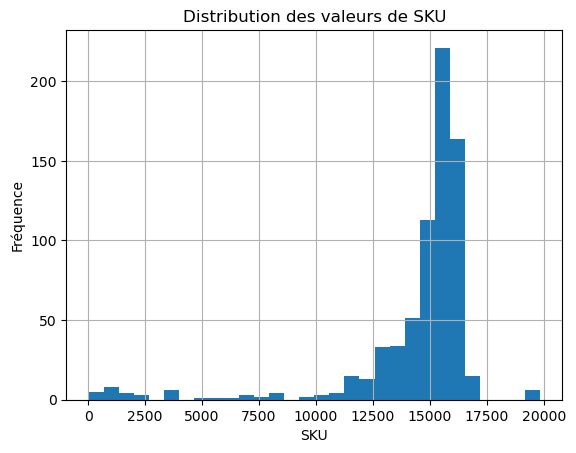

In [8675]:
#correction des valeurs sku qui ne respecte pas la codification ( conversion en numérique)
df_web['sku'] = pd.to_numeric(df_web['sku'], errors='coerce')


#Visualisation des valeurs de la colonne sku
#Afficher les premières lignes :
print(df_web['sku'].head())
#Afficher les valeurs uniques :
print(df_web['sku'].unique())
#Compter le nombre de chaque valeur unique :
print(df_web['sku'].value_counts())
#Visualiser la distribution des valeurs 
import matplotlib.pyplot as plt

num_str = "10"  # ceci est une chaîne de caractères
num_int = 5  # ceci est un entier

# Convertir la chaîne de caractères en entier
num_str = int(num_str)

# Maintenant, vous pouvez les comparer
if num_str <= num_int:
    print("La chaîne de caractères convertie en nombre est inférieure ou égale à l'entier.")
else:
    print("La chaîne de caractères convertie en nombre est supérieure à l'entier.")

#visaulisation de la distribution des valeurs
import matplotlib.pyplot as plt

df_web['sku'].hist(bins=30)
plt.xlabel('SKU')
plt.ylabel('Fréquence')
plt.title('Distribution des valeurs de SKU')
plt.show()



#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?

def respecte_la_regle(sku):
    # Remplacez cette fonction par votre propre logique de vérification
    return True if 'certaine condition' else False

# Appliquer la fonction à la colonne 'sku'
df_web['respecte_la_regle'] = df_web['sku'].apply(respecte_la_regle)




In [8676]:
# Afficher les lignes qui ne respectent pas la règle
print(df_web[df_web['respecte_la_regle'] == False])

Empty DataFrame
Columns: [sku, virtual, total_sales, tax_status, post_author, post_date, product_type, post_title, post_status, post_name, post_type, post_mime_type, respecte_la_regle]
Index: []


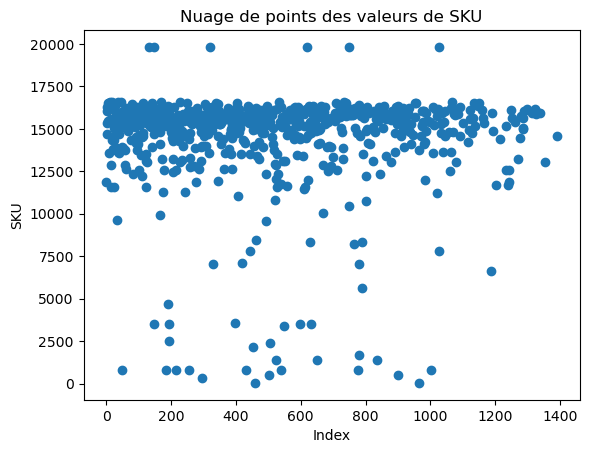

In [8677]:
plt.scatter(df_web.index, df_web['sku'])
plt.xlabel('Index')
plt.ylabel('SKU')
plt.title('Nuage de points des valeurs de SKU')
plt.show()

In [8678]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
# Identifiez les codes d'articles qui ne sont pas des nombres entiers
non_int_sku = df_web[~df_web['sku'].apply(lambda x: str(x).isdigit())]

# Affichez les codes d'articles qui ne respectent pas la règle de codification
print(non_int_sku)

          sku  virtual  total_sales tax_status  post_author  \
0     11862.0        0          3.0        NaN          2.0   
1     16057.0        0          5.0        NaN          2.0   
2     14692.0        0          5.0    taxable          2.0   
3     16295.0        0         14.0        NaN          2.0   
4     15328.0        0          2.0    taxable          2.0   
...       ...      ...          ...        ...          ...   
1325  16043.0        0         10.0    taxable          2.0   
1327  15845.0        0          9.0        NaN          2.0   
1339  15951.0        0          9.0        NaN          2.0   
1353  13074.0        0          4.0        NaN          2.0   
1391  14569.0        0         13.0        NaN          2.0   

               post_date product_type  \
0    2018-02-12 13:46:23          Vin   
1    2018-04-17 15:29:17          Vin   
2    2019-03-19 10:06:47          Vin   
3    2018-02-15 14:05:06          Vin   
4    2019-03-27 18:05:09          Vin 

In [8679]:
#Identifier les lignes sans code articles
# Identifiez les lignes où 'sku' est manquant
missing_sku = df_web[df_web['sku'].isnull()]

# Affichez ces lignes
print(missing_sku)

     sku  virtual  total_sales tax_status  post_author           post_date  \
8    NaN        0          NaN        NaN          NaN                 NaT   
272  NaN        0          4.0    taxable          2.0 2020-06-09 15:42:04   
842  NaN        0          7.0        NaN          1.0 2018-06-01 13:53:46   

    product_type                                    post_title post_status  \
8            NaN                                           NaN         NaN   
272          Vin  Clos du Mont-Olivet Châteauneuf-du-Pape 2007     publish   
842        Autre                             Bon cadeau de 25€     publish   

                                          post_name   post_type  \
8                                               NaN         NaN   
272  clos-du-mont-olivet-chateauneuf-du-pape-2007-2     product   
842                          bon-cadeau-de-25-euros  attachment   

    post_mime_type  respecte_la_regle  
8              NaN               True  
272            NaN       

In [8680]:
def highlight_nulls(s):
    return ['background-color: yellow' if v is np.nan else '' for v in s]
styled = missing_sku.style.apply(highlight_nulls)
styled

,sku,virtual,total_sales,tax_status,post_author,post_date,product_type,post_title,post_status,post_name,post_type,post_mime_type,respecte_la_regle
8,nan,0,nan,nan,nan,NaT,nan,nan,nan,nan,nan,nan,True
272,nan,0,4.000000,taxable,2.000000,2020-06-09 15:42:04,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,publish,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,product,nan,True
842,nan,0,7.000000,nan,1.000000,2018-06-01 13:53:46,Autre,Bon cadeau de 25€,publish,bon-cadeau-de-25-euros,attachment,image/jpeg,True


In [8681]:
#Pour les codes articles identifiés, réalisé une analyse et définissez l'action à entreprendre
unique_article_codes = df_web['sku'].unique()
print("Codes d'articles uniques :", unique_article_codes)



Codes d'articles uniques : [11862. 16057. 14692. 16295. 15328. 15471. 16515. 16246.    nan 13572.
 16513. 16585. 16269. 15526. 12869. 15575. 11586. 14338. 15425. 16560.
 15361. 13809. 11587. 15022. 14323. 16342. 16029. 15475. 13754. 14680.
 15875.  9636. 13849. 13662. 16564. 13557. 15429. 14712. 15032. 15481.
 15448. 16580. 15441.   804. 15300. 13958. 16071. 15678. 13895. 15711.
 12882. 16053. 13766. 16247. 12640. 15292. 15476. 15670. 16189. 16038.
 14864. 16044. 15324. 15531. 15953. 15413. 15733. 14366. 15895. 15892.
 16472. 15185. 16010. 15793. 15849. 12315. 15741. 15934. 15148. 15781.
 15659. 15106. 15490. 14507. 14149. 16307. 13736. 14090. 16037. 15758.
 14661. 12587. 15337. 15489. 15201. 16305. 16131. 13435. 15747. 12203.
 14509. 14768. 16262. 14561. 16505. 15717. 16129. 13460. 15871. 15940.
 11602. 13127. 13520. 15480. 13032. 15436. 15269. 15910. 19821. 16263.
 15138. 15146. 15126. 15482. 16186. 13905. 16540. 15856. 15677. 14700.
 15325. 19815.  3506. 16056. 14975. 15341. 15204. 

In [8682]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
## Vérifier s'il y a des lignes en double
duplicates = df_web.duplicated()

## Si le nombre de True (qui représente les doublons) est supérieur à 0, alors il y a des doublons
if duplicates.sum() > 0:
    print(f"Il y a {duplicates.sum()} lignes en double.")
else:
    print("Il n'y a pas de lignes en double.")

Il n'y a pas de lignes en double.


In [8683]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
### Créer un nouveau dataframe avec uniquement les lignes où 'article_code' est manquant
df_without_article_code = df_web[df_web['sku'].isna()]


#3 - Que constatez-vous?
##Il semble qu'il ya beaucoup de valeurs manquantes
##dans la plupart des colonnes, à l’exception de ‘virtual’ et ‘respecte_la_regle’. 
##Cela pourrait poser des problèmes pour toute analyse ultérieure. 
##Vous devrez peut-être prendre des décisions sur la façon de gérer ces valeurs manquantes, 
##par exemple en les supprimant ou en les imputant.

In [8684]:
###Afficher les premières lignes du nouveau dataframe
print(df_without_article_code.head())

     sku  virtual  total_sales tax_status  post_author           post_date  \
8    NaN        0          NaN        NaN          NaN                 NaT   
272  NaN        0          4.0    taxable          2.0 2020-06-09 15:42:04   
842  NaN        0          7.0        NaN          1.0 2018-06-01 13:53:46   

    product_type                                    post_title post_status  \
8            NaN                                           NaN         NaN   
272          Vin  Clos du Mont-Olivet Châteauneuf-du-Pape 2007     publish   
842        Autre                             Bon cadeau de 25€     publish   

                                          post_name   post_type  \
8                                               NaN         NaN   
272  clos-du-mont-olivet-chateauneuf-du-pape-2007-2     product   
842                          bon-cadeau-de-25-euros  attachment   

    post_mime_type  respecte_la_regle  
8              NaN               True  
272            NaN       

In [8685]:
#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
# Utiliser la méthode info() pour obtenir des informations sur le dataframe
df_without_article_code.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 8 to 842
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                0 non-null      float64       
 1   virtual            3 non-null      int64         
 2   total_sales        2 non-null      float64       
 3   tax_status         1 non-null      object        
 4   post_author        2 non-null      float64       
 5   post_date          2 non-null      datetime64[ns]
 6   product_type       2 non-null      object        
 7   post_title         2 non-null      object        
 8   post_status        2 non-null      object        
 9   post_name          2 non-null      object        
 10  post_type          2 non-null      object        
 11  post_mime_type     1 non-null      object        
 12  respecte_la_regle  3 non-null      bool          
dtypes: bool(1), datetime64[ns](1), float64(3), int64(1), object(7)
memory us

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [8686]:
#Dimension du dataset
# Afficher les premières lignes du DataFrame
print(df_liaison.head())

# Afficher les informations générales du DataFrame
print(df_liaison.info())

# Afficher les statistiques descriptives du DataFrame
print(df_liaison.describe())
#Nombre d'observations
# Obtenir le nombre d'observations
num_observations = df_liaison.shape[0]

print(f"Nombre d'observations : {num_observations}")
#Nombre de caractéristiques
# Obtenir le nombre de caractéristiques
num_features = df_liaison.shape[1]

print(f"Nombre de caractéristiques : {num_features}")

  id_web  product_id
0  15298        3847
1  15296        3849
2  15300        3850
3  19814        4032
4  19815        4039
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB
None
        product_id
count   825.000000
mean   5162.597576
std     902.644635
min    3847.000000
25%    4348.000000
50%    4907.000000
75%    5805.000000
max    7338.000000
Nombre d'observations : 825
Nombre de caractéristiques : 2


In [8687]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
### Utiliser la méthode info() pour obtenir des informations sur le DataFrame
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [8688]:
# Supprimer les doublons dans la colonne 'id_web'
df_liaison_unique = df_liaison.drop_duplicates(subset='id_web')

# Vérifier à nouveau si toutes les valeurs sont uniques
num_unique_values = df_liaison_unique['id_web'].nunique()
num_total_values = df_liaison_unique.shape[0]

if num_unique_values == num_total_values:
    print("Après avoir supprimé les doublons, toutes les valeurs de la colonne 'id_web' sont uniques.")
else:
    print("Même après avoir supprimé les doublons, toutes les valeurs de la colonne 'id_web' ne sont pas uniques.")

Même après avoir supprimé les doublons, toutes les valeurs de la colonne 'id_web' ne sont pas uniques.


In [8689]:
# Liste des valeurs non correspondantes
non_correspondances = ['13127-1', '14680-1', 'bon-cadeau-25']

# Vérifier si 'id_web' est dans la liste des non-correspondances, est vide ou est une chaîne de caractères
df_liaison['sans_correspondance'] = df_liaison['id_web'].isin(non_correspondances) | df_liaison['id_web'].isnull() | df_liaison['id_web'].apply(lambda x: isinstance(x, str))

# Calculer le nombre d'articles sans correspondance
articles_sans_correspondance = df_liaison['sans_correspondance'].sum()

if articles_sans_correspondance > 0:
    print(f"Il y a {articles_sans_correspondance} articles sans correspondance.")
else:
    print("Il n'y a pas d'articles sans correspondance.")

Il y a 94 articles sans correspondance.


In [8690]:
# Supprimer les lignes avec les valeurs spécifiques dans la colonne 'id_web'
df_avec_correspondance = df_avec_correspondance[~df_avec_correspondance['id_web'].isin(valeurs_a_supprimer)]
# Filtrer le DataFrame pour exclure les articles sans correspondance
df_avec_correspondance = df_liaison[~df_liaison['sans_correspondance']]

# Calculer le nombre total d'articles avec une correspondance
total_articles_avec_correspondance = len(df_avec_correspondance)

print(f"Il y a {total_articles_avec_correspondance} articles avec une correspondance.")

#calcule total article df_web, df_erp, df_liaison
total_articles_web = df_web.shape[0]
total_articles_erp = df_erp.shape[0]
total_articles_liaison = df_liaison.shape[0]
# Calculer le pourcentage d'articles sans correspondance
pourcentage_sans_correspondance = (articles_sans_correspondance / total_articles_web) * 100

print(f"Le pourcentage d'articles sans correspondance est de {pourcentage_sans_correspondance:.2f}%.")

Il y a 731 articles avec une correspondance.
Le pourcentage d'articles sans correspondance est de 13.15%.


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [8691]:
# Afficher les noms de colonnes de df_erp
print("Noms de colonnes de df_erp :")
print(df_erp.columns)

# Afficher les noms de colonnes de df_liaison
print("\nNoms de colonnes de df_liaison :")
print(df_liaison.columns)

Noms de colonnes de df_erp :
Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status',
       'purchase_price', 'stock_status_2'],
      dtype='object')

Noms de colonnes de df_liaison :
Index(['id_web', 'product_id', 'sans_correspondance'], dtype='object')


In [8692]:
#Fusion des fichiers df_erp et df_liaison
# Fusionner les deux dataframes sur la colonne 'product_id'
df_merge = df_erp.merge(df_liaison, on='product_id')

# Afficher les premières lignes du dataframe fusionné
print(df_merge.head())

   product_id  onsale_web  price  stock_quantity stock_status  purchase_price  \
0        3847           1   24.2              16      instock           12.88   
1        3849           1   34.3              10      instock           17.54   
2        3850           1   20.8               0   outofstock           10.64   
3        4032           1   14.1              26      instock            6.92   
4        4039           1   46.0               3   outofstock           23.77   

  stock_status_2 id_web  sans_correspondance  
0        instock  15298                False  
1        instock  15296                False  
2     outofstock  15300                False  
3        instock  19814                False  
4     outofstock  19815                False  


In [8693]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
# Fusionner les deux dataframes avec un indicateur
df_merge = df_erp.merge(df_liaison, on='product_id', how='outer', indicator=True)

# Trouver les lignes qui ne correspondent pas
no_match = df_merge[df_merged['_merge'] != 'both']

print("Lignes ne correspondant pas :")
print(no_match)

Lignes ne correspondant pas :
Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price, stock_status_2, id_web, sans_correspondance, _merge]
Index: []


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [8694]:

# Afficher les noms de colonnes de df_merge
print("Noms de colonnes de df_merge :")
print(df_merge.columns)

# Afficher les noms de colonnes de df_web
print("\nNoms de colonnes de df_web :")
print(df_web.columns)

Noms de colonnes de df_merge :
Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status',
       'purchase_price', 'stock_status_2', 'id_web', 'sans_correspondance',
       '_merge'],
      dtype='object')

Noms de colonnes de df_web :
Index(['sku', 'virtual', 'total_sales', 'tax_status', 'post_author',
       'post_date', 'product_type', 'post_title', 'post_status', 'post_name',
       'post_type', 'post_mime_type', 'respecte_la_regle'],
      dtype='object')


In [8695]:
#Fusionnez les datasets df_merged et df_web
# Fusionner df_merged et df_web
df_final = df_merge.merge(df_web, left_on='id_web', right_on='sku')

# Afficher les premières lignes du dataframe fusionné
print(df_final.head())

   product_id  onsale_web  price  stock_quantity stock_status  purchase_price  \
0        3847           1   24.2              16      instock           12.88   
1        3849           1   34.3              10      instock           17.54   
2        3850           1   20.8               0   outofstock           10.64   
3        4032           1   14.1              26      instock            6.92   
4        4039           1   46.0               3   outofstock           23.77   

  stock_status_2 id_web  sans_correspondance _merge      sku  virtual  \
0        instock  15298                False   both  15298.0        0   
1        instock  15296                False   both  15296.0        0   
2     outofstock  15300                False   both  15300.0        0   
3        instock  19814                False   both  19814.0        0   
4     outofstock  19815                False   both  19815.0        0   

   total_sales tax_status  post_author           post_date product_type  \

In [8696]:
#Avons-nous des lignes sans correspondances?
# Trouver les lignes sans correspondances
no_match = df_final[df_final.isna().any(axis=1)]

print("Lignes sans correspondances :")
print(no_match)

# Trouver les lignes où toutes les colonnes ne sont pas renseignées
all_na = df_final[df_final.isna().all(axis=1)]

print("\nLignes où toutes les colonnes ne sont pas renseignées :")
print(all_na)

Lignes sans correspondances :
     product_id  onsale_web  price  stock_quantity stock_status  \
0          3847           1   24.2              16      instock   
1          3849           1   34.3              10      instock   
2          3850           1   20.8               0   outofstock   
3          4032           1   14.1              26      instock   
4          4039           1   46.0               3   outofstock   
..          ...         ...    ...             ...          ...   
980        6928           1   19.0              15      instock   
981        6930           1    8.4              28      instock   
982        7023           1   27.5              23      instock   
983        7025           1   69.0               8      instock   
984        7338           1   16.3              40      instock   

     purchase_price stock_status_2 id_web  sans_correspondance _merge  \
0             12.88        instock  15298                False   both   
1             17.54

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

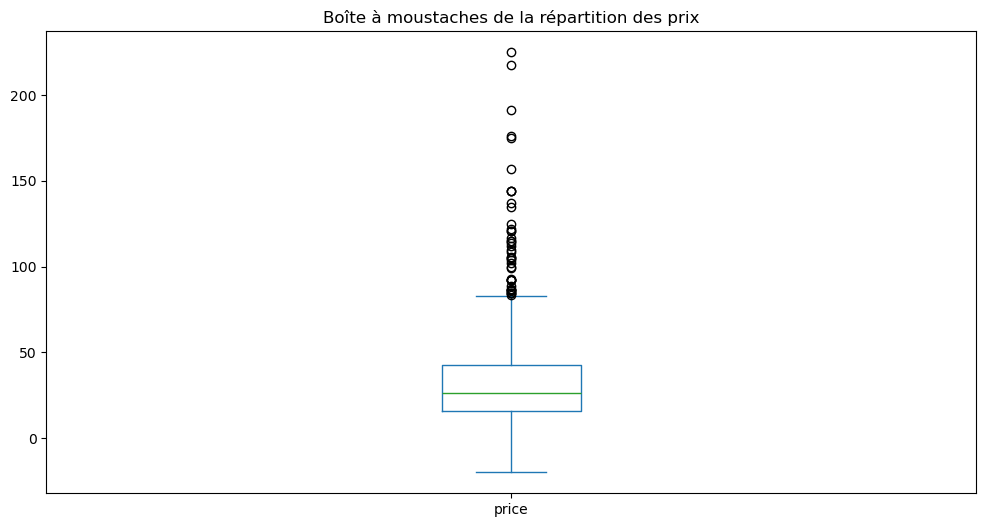

In [8697]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
# Créer une boîte à moustaches de la répartition des prix
plt.figure(figsize=(12, 6))
df_final['price'].plot(kind='box')
plt.title('Boîte à moustaches de la répartition des prix')
plt.show()

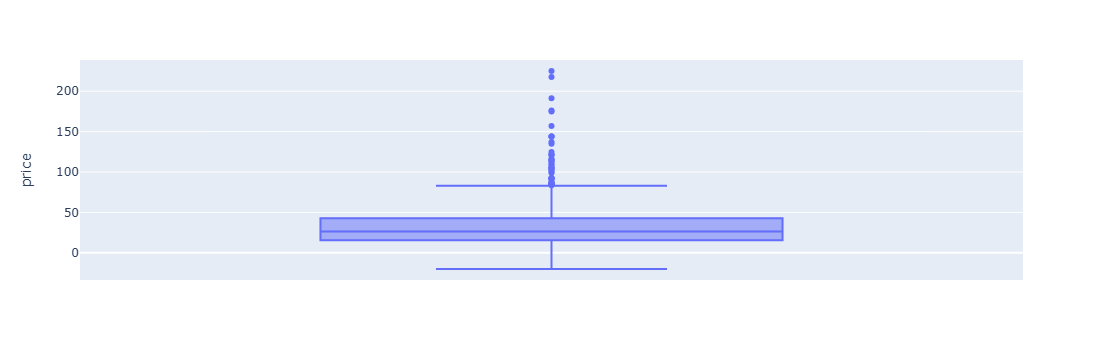

In [8698]:
#Autre méthode avec plotly express
# Créer une boîte à moustaches de la répartition des prix
fig = px.box(df_final, y='price')

# Afficher la figure
fig.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utilisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [8699]:
# Calculer la moyenne du prix
moyenne_prix = df_erp['price'].mean()
print("La moyenne du prix est :", moyenne_prix)


# Calculer l'écart-type du prix
ecart_type_prix = df_erp['price'].std()
print("L'écart-type du prix est :", ecart_type_prix)

# Calculer le Z-score
df_erp['z_score'] = np.abs((df_erp['price'] - moyenne_prix) / ecart_type_prix)
print("Les Z-scores sont :\n", df_erp['z_score'])

La moyenne du prix est : 32.187696969696965
L'écart-type du prix est : 26.712076775505285
Les Z-scores sont :
 0      0.299029
1      0.079077
2      0.426313
3      0.677136
4      0.517081
         ...   
820    0.479645
821    0.479645
822    0.846520
823    0.212926
824    0.594776
Name: z_score, Length: 825, dtype: float64


In [8700]:
# Calculer le seuil de prix pour un Z-score de 3
seuil_prix = moyenne_prix + 3 * ecart_type_prix

# Afficher le seuil de prix
print("Le seuil de prix pour un Z-score de 3 est :", seuil_prix)

Le seuil de prix pour un Z-score de 3 est : 112.32392729621282


In [8701]:
from scipy import stats

# Calculer la moyenne du prix
moyenne_prix = df_erp['price'].mean()

# Calculer l'écart-type du prix
ecart_type_prix = df_erp['price'].std()

# Calculer le Z-score pour chaque prix et l'ajouter au DataFrame
df_erp['z_score'] = ((df_erp['price'] - moyenne_prix) / ecart_type_prix).round(2)

# Filtrer le DataFrame pour obtenir les lignes où le z-score est supérieur à 3
df_outliers = df_erp[df_erp['z_score'] > 3]

# Afficher les prix dont le z-score > 3
print(df_outliers[['product_id', 'price', 'z_score']])

     product_id  price  z_score
208        4352  225.0     7.22
227        4402  176.0     5.38
230        4406  157.0     4.67
242        4594  144.0     4.19
411        4904  137.0     3.92
460        5001  217.5     6.94
556        5612  124.8     3.47
598        5767  175.0     5.35
635        5892  191.3     5.96
651        5917  122.0     3.36
652        5918  114.0     3.06
697        6126  135.0     3.85
703        6202  116.4     3.15
708        6212  115.0     3.10
709        6213  121.0     3.32
711        6215  115.0     3.10
712        6216  121.0     3.32


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [8702]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
# Utilisation de la fonction describe de pandas
description = df_final['price'].describe().round(2)
print (description)

count    985.00
mean      32.56
std       26.01
min      -20.00
25%       15.50
50%       26.50
75%       42.60
max      225.00
Name: price, dtype: float64


In [8703]:
# Sélectionner uniquement les colonnes numériques
df_final_numeric = df_final.select_dtypes(include=[np.number])

# Calculer Q1, Q3 et l'IQR pour chaque colonne de df_final_numeric
Q1 = df_final_numeric.quantile(0.25)
Q3 = df_final_numeric.quantile(0.75)
IQR = Q3 - Q1

# Ajouter une colonne 'outliers' qui indique si chaque ligne est une valeur aberrante
df_final['outliers'] = ((df_final_numeric < (Q1 - 1.5 * IQR)) | (df_final_numeric > (Q3 + 1.5 * IQR))).any(axis=1)



In [8704]:
#Définissez un seuil pour les articles "outliers" en prix
# Calculer Q1, Q3 et IQR
Q1 = df_erp['price'].quantile(0.25)
Q3 = df_erp['price'].quantile(0.75)
IQR = Q3 - Q1

# Définir les seuils pour les valeurs aberrantes
seuil_inf = Q1 - 1.5 * IQR
seuil_sup = Q3 + 1.5 * IQR


print( seuil_inf)
print( seuil_sup)

-26.75
83.25


In [8705]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
# Calculer le nombre d'outliers
nb_outliers = df_erp[(df_erp['price'] < seuil_inf) | (df_erp['price'] > seuil_sup)].shape[0]
print("Nombre d'articles au dessus du seuil des outliers:", nb_outliers)


# Calculer la proportion d'outliers en pourcentage
import math

# Calculer le nombre total d'articles
nb_total = df_erp.shape[0]

# Calculer le nombre d'articles dont le prix est supérieur au seuil
nb_outliers = df_erp[df_erp['price'] > seuil_sup].shape[0]

# Calculer la proportion en pourcentage
pourcentage_outliers = (nb_outliers / nb_total) * 100

# Arrondir à l'entier inférieur
pourcentage_outliers = math.floor(pourcentage_outliers)

print("Pourcentage d'articles au-dessus du seuil des outliers : {:.1f}%".format(pourcentage_outliers))






Nombre d'articles au dessus du seuil des outliers: 36
Pourcentage d'articles au-dessus du seuil des outliers : 4.0%


In [8706]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
nb_articles = df_erp['product_id'].shape[0]
print("Nombre d'articles dans df_final :", nb_articles)

Nombre d'articles dans df_final : 825


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [8707]:
#nettoyer df_erp 
# Supprimer les doublons
#df_erp = df_erp.drop_duplicates(subset=['product_id'])


# Supprimer les NaN et les cellules vides
#df_erp = df_erp.replace('', np.nan).dropna(subset=['product_id'])


# Supprimer les cellules qui sont des chaînes de caractères
# Pour 'product_id' dans df_erp
#df_erp = df_erp[pd.to_numeric(df_erp['product_id'], errors='coerce').notnull()]


# Nombre de lignes dans df_erp
#num_rows_erp = df_erp.shape[0]
print("Nombre de lignes dans df_erp :", num_rows_erp)

Nombre de lignes dans df_erp : 825


In [8708]:

#nettoyer  df_web
# Supprimer les doublons
#df_web = df_web.drop_duplicates(subset=['sku'])

# Supprimer les NaN et les cellules vides
#df_web = df_web.replace('', np.nan).dropna(subset=['sku'])

# Supprimer les NaN pour les colonnes spécifiques
#df_web = df_web.dropna(subset=['sku'])

# Supprimer les cellules qui sont des chaînes de caractères

# Pour 'sku' dans df_web
#df_web = df_web[pd.to_numeric(df_web['sku'], errors='coerce').notnull()]

# Nombre de lignes dans df_web
#num_rows_web = df_web.shape[0]
#print("Nombre de lignes dans df_web :", num_rows_web)



In [8709]:
# Nombre de lignes uniques dans df_web basé sur 'sku'
#num_unique_rows_web = df_web['sku'].nunique()
print("Nombre de lignes uniques dans df_web basé sur 'sku' :", num_unique_rows_web)

Nombre de lignes uniques dans df_web basé sur 'sku' : 714


In [8710]:

# Supprimer les doublons
#df_liaison = df_liaison.drop_duplicates(subset=['id_web', 'product_id'])

# Supprimer les NaN et les cellules vides
#df_liaison = df_liaison.replace('', np.nan).dropna(subset=['id_web', 'product_id'])

# Supprimer les cellules qui sont des chaînes de caractères
# Pour 'product_id' dans df_liaison
#df_liaison = df_liaison[pd.to_numeric(df_liaison['product_id'], errors='coerce').notnull()]

# Pour 'id_web' dans df_liaison
#df_liaison = df_liaison[pd.to_numeric(df_liaison['id_web'], errors='coerce').notnull()]
# Nombre de lignes dans df_liaison
#num_rows_liaison = df_liaison.shape[0]
print("Nombre de lignes dans df_liaison :", num_rows_liaison)

Nombre de lignes dans df_liaison : 731


In [8711]:
# Afficher les noms de colonnes de df_erp
print("Noms de colonnes de df_erp :")
print(df_erp.columns)

# Afficher les noms de colonnes de df_liaison
print("Noms de colonnes de df_liaison :")
print(df_liaison.columns)

Noms de colonnes de df_erp :
Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status',
       'purchase_price', 'stock_status_2', 'z_score'],
      dtype='object')
Noms de colonnes de df_liaison :
Index(['id_web', 'product_id', 'sans_correspondance'], dtype='object')


In [8712]:
df_final.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2,id_web,sans_correspondance,_merge,sku,virtual,total_sales,tax_status,post_author,post_date,product_type,post_title,post_status,post_name,post_type,post_mime_type,respecte_la_regle,outliers
0,3847,1,24.2,16,instock,12.88,instock,15298,False,both,15298.0,0,6.0,taxable,2.0,2018-02-08 12:58:52,Vin,Pierre Jean Villa Saint-Joseph Préface 2018,publish,pierre-jean-villa-saint-joseph-preface-2018,product,NaN,True,False
1,3849,1,34.3,10,instock,17.54,instock,15296,False,both,15296.0,0,9.0,taxable,2.0,2018-02-08 13:49:41,Vin,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,publish,pierre-jean-villa-saint-joseph-tilde-2017,product,NaN,True,False
2,3850,1,20.8,0,outofstock,10.64,outofstock,15300,False,both,15300.0,0,0.0,NaN,2.0,2018-02-08 14:08:36,Vin,Pierre Jean Villa Crozes-Hermitage Accroche Co...,publish,pierre-jean-villa-croze-hermitage-accroche-coe...,attachment,image/jpeg,True,False
3,4032,1,14.1,26,instock,6.92,instock,19814,False,both,19814.0,0,12.0,NaN,2.0,2018-02-09 14:01:05,Vin,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,publish,pierre-jean-villa-igp-gamine-2018,attachment,image/jpeg,True,True
4,4039,1,46.0,3,outofstock,23.77,outofstock,19815,False,both,19815.0,0,3.0,NaN,2.0,2018-02-12 09:04:37,Vin,Pierre Jean Villa Côte Rôtie Carmina 2017,publish,pierre-jean-villa-cote-rotie-carmina-2017,attachment,image/jpeg,True,True


In [8713]:
# Supprimer les doublons
df_final = df_final.drop_duplicates()

# Supprimer les valeurs NaN
#df_final = df_final.dropna()

In [8714]:
df_final.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2,id_web,sans_correspondance,_merge,sku,virtual,total_sales,tax_status,post_author,post_date,product_type,post_title,post_status,post_name,post_type,post_mime_type,respecte_la_regle,outliers
0,3847,1,24.2,16,instock,12.88,instock,15298,False,both,15298.0,0,6.0,taxable,2.0,2018-02-08 12:58:52,Vin,Pierre Jean Villa Saint-Joseph Préface 2018,publish,pierre-jean-villa-saint-joseph-preface-2018,product,NaN,True,False
1,3849,1,34.3,10,instock,17.54,instock,15296,False,both,15296.0,0,9.0,taxable,2.0,2018-02-08 13:49:41,Vin,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,publish,pierre-jean-villa-saint-joseph-tilde-2017,product,NaN,True,False
2,3850,1,20.8,0,outofstock,10.64,outofstock,15300,False,both,15300.0,0,0.0,NaN,2.0,2018-02-08 14:08:36,Vin,Pierre Jean Villa Crozes-Hermitage Accroche Co...,publish,pierre-jean-villa-croze-hermitage-accroche-coe...,attachment,image/jpeg,True,False
3,4032,1,14.1,26,instock,6.92,instock,19814,False,both,19814.0,0,12.0,NaN,2.0,2018-02-09 14:01:05,Vin,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,publish,pierre-jean-villa-igp-gamine-2018,attachment,image/jpeg,True,True
4,4039,1,46.0,3,outofstock,23.77,outofstock,19815,False,both,19815.0,0,3.0,NaN,2.0,2018-02-12 09:04:37,Vin,Pierre Jean Villa Côte Rôtie Carmina 2017,publish,pierre-jean-villa-cote-rotie-carmina-2017,attachment,image/jpeg,True,True


In [8715]:
# Définir les seuils inférieur et supérieur pour la colonne 'price'
Q1 = df_final['price'].quantile(0.25)
Q3 = df_final['price'].quantile(0.75)
IQR = Q3 - Q1

seuil_inf = Q1 - 1.5 * IQR
seuil_sup = Q3 + 1.5 * IQR

# Supprimer les valeurs aberrantes de la colonne 'price'
#df_final = df_final[(df_final['price'] >= seuil_inf) & (df_final['price'] <= seuil_sup)]

In [8716]:
# Afficher les noms de colonnes de df_final
print("Noms de colonnes de df_final :")
print(df_final.columns)

df_final.head()

Noms de colonnes de df_final :
Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status',
       'purchase_price', 'stock_status_2', 'id_web', 'sans_correspondance',
       '_merge', 'sku', 'virtual', 'total_sales', 'tax_status', 'post_author',
       'post_date', 'product_type', 'post_title', 'post_status', 'post_name',
       'post_type', 'post_mime_type', 'respecte_la_regle', 'outliers'],
      dtype='object')


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2,id_web,sans_correspondance,_merge,sku,virtual,total_sales,tax_status,post_author,post_date,product_type,post_title,post_status,post_name,post_type,post_mime_type,respecte_la_regle,outliers
0,3847,1,24.2,16,instock,12.88,instock,15298,False,both,15298.0,0,6.0,taxable,2.0,2018-02-08 12:58:52,Vin,Pierre Jean Villa Saint-Joseph Préface 2018,publish,pierre-jean-villa-saint-joseph-preface-2018,product,NaN,True,False
1,3849,1,34.3,10,instock,17.54,instock,15296,False,both,15296.0,0,9.0,taxable,2.0,2018-02-08 13:49:41,Vin,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,publish,pierre-jean-villa-saint-joseph-tilde-2017,product,NaN,True,False
2,3850,1,20.8,0,outofstock,10.64,outofstock,15300,False,both,15300.0,0,0.0,NaN,2.0,2018-02-08 14:08:36,Vin,Pierre Jean Villa Crozes-Hermitage Accroche Co...,publish,pierre-jean-villa-croze-hermitage-accroche-coe...,attachment,image/jpeg,True,False
3,4032,1,14.1,26,instock,6.92,instock,19814,False,both,19814.0,0,12.0,NaN,2.0,2018-02-09 14:01:05,Vin,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,publish,pierre-jean-villa-igp-gamine-2018,attachment,image/jpeg,True,True
4,4039,1,46.0,3,outofstock,23.77,outofstock,19815,False,both,19815.0,0,3.0,NaN,2.0,2018-02-12 09:04:37,Vin,Pierre Jean Villa Côte Rôtie Carmina 2017,publish,pierre-jean-villa-cote-rotie-carmina-2017,attachment,image/jpeg,True,True


In [8717]:
##############################
# Calculer le CA su site web #
##############################
#df_final['CA_par_article']= df_final ['price']* df_final['total_sales']

# Filtrer le DataFrame pour exclure les lignes où 'onsale_web' est égal à 0
df_final_filtered = df_final[df_final['onsale_web'] != 0]

# Création de la colonne 'CA_par_article' avec le DataFrame filtré
df_final_filtered['CA_par_article'] = df_final_filtered['price'] * df_final_filtered['total_sales']

# Afficher les premières lignes du DataFrame pour vérifier
print(df_final_filtered.head())

# Calcul de la somme de la colonne 'CA_par_article' avec le DataFrame filtré
somme_CA_par_article = df_final_filtered['CA_par_article'].sum()

print(f"La somme de la colonne 'CA_par_article' avec le DataFrame filtré est : {somme_CA_par_article}")

   product_id  onsale_web  price  stock_quantity stock_status  purchase_price  \
0        3847           1   24.2              16      instock           12.88   
1        3849           1   34.3              10      instock           17.54   
2        3850           1   20.8               0   outofstock           10.64   
3        4032           1   14.1              26      instock            6.92   
4        4039           1   46.0               3   outofstock           23.77   

  stock_status_2 id_web  sans_correspondance _merge      sku  virtual  \
0        instock  15298                False   both  15298.0        0   
1        instock  15296                False   both  15296.0        0   
2     outofstock  15300                False   both  15300.0        0   
3        instock  19814                False   both  19814.0        0   
4     outofstock  19815                False   both  19815.0        0   

   total_sales tax_status  post_author           post_date product_type  \

In [8718]:
#df_web = pd.read_excel("web.xlsx")


In [8719]:
#Ce résultat correspond au chiffre d'affaire du site web

# Sélectionnez uniquement les produits vendus en ligne
df_final_online = df_final[df_final['onsale_web']==1]

# Création de la colonne 'CA_par_article_web'
df_final['CA_par_article_web'] = df_final['price'] * df_final_online['total_sales']

# Calcul de la somme de la colonne 'CA_par_article_web'
somme_CA_par_article = df_final['CA_par_article_web'].sum()

print(f"La somme de la colonne 'CA_par_article_web' est : {somme_CA_par_article}")

La somme de la colonne 'CA_par_article_web' est : 156264.7


In [8720]:
# Afficher les noms de colonnes de df_web
print("Noms de colonnes de df_web :")
print(df_web.columns)

Noms de colonnes de df_web :
Index(['sku', 'virtual', 'total_sales', 'tax_status', 'post_author',
       'post_date', 'product_type', 'post_title', 'post_status', 'post_name',
       'post_type', 'post_mime_type', 'respecte_la_regle'],
      dtype='object')


Le palmarès des articles en termes de chiffre d'affaires est :
 total_sales
7.0      36000.3
4.0      22553.2
6.0      14922.0
9.0      14531.4
8.0      14366.4
10.0     12519.0
5.0      11805.5
11.0     11193.6
12.0      8973.6
13.0      7624.5
3.0       7468.5
116.0     6844.0
14.0      3096.8
2.0       2884.6
15.0      2325.0
22.0      1944.8
122.0     1549.4
111.0     1232.1
20.0       928.0
17.0       882.3
1.0        880.1
16.0       875.2
24.0       357.6
36.0       356.4
27.0       267.3
18.0       208.8
0.0          0.0
Name: CA_par_article, dtype: float64
     product_id  onsale_web  price  stock_quantity stock_status  \
349        4150           1   59.0             123      instock   
472        4352           1  225.0               0   outofstock   
594        4726           1   12.7               0   outofstock   
717        5067           1   59.9               3      instock   
722        5379           1   11.1              33      instock   
859        5892           

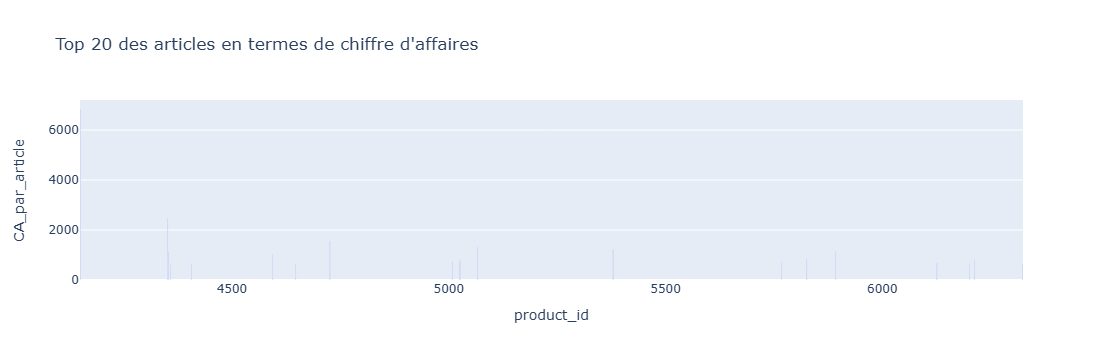

In [8721]:
###############################
# Palmares des articles en CA #
###############################
df_final['CA_par_article'] = df_final['price'] * df_final['total_sales']

### Calculer le chiffre d'affaires pour chaque article
CA_par_article = df_final.groupby('total_sales')['CA_par_article'].sum()

# Trier les articles par chiffre d'affaires en ordre décroissant
palmares_CA = CA_par_article.sort_values(ascending=False)

print("Le palmarès des articles en termes de chiffre d'affaires est :\n", palmares_CA)

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_final_sorted = df_final.sort_values('CA_par_article', ascending=False)
#Réinitialiser l'index du dataset par un reset_index
# Réinitialiser l'index du DataFrame
df_final = df_final.reset_index(drop=True)
#Afficher les 20 premier articles en CA
# Trier le DataFrame par CA par article dans l'ordre décroissant
df_final_sorted = df_final.sort_values(by='CA_par_article', ascending=False)

# Afficher les 20 premiers articles en CA
print(df_final_sorted.head(20))
import plotly.express as px

# Trier le DataFrame par CA par article dans l'ordre décroissant et prendre les 20 premiers
df_top20 = df_final.sort_values(by='CA_par_article', ascending=False).head(20)

# Créer un graphique à barres avec plotly.express
fig = px.bar(df_top20, x='product_id', y='CA_par_article', title="Top 20 des articles en termes de chiffre d'affaires")

# Afficher le graphique
fig.show()

In [8722]:
print("Noms de colonnes de df_final :")
print(df_final.columns)

Noms de colonnes de df_final :
Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status',
       'purchase_price', 'stock_status_2', 'id_web', 'sans_correspondance',
       '_merge', 'sku', 'virtual', 'total_sales', 'tax_status', 'post_author',
       'post_date', 'product_type', 'post_title', 'post_status', 'post_name',
       'post_type', 'post_mime_type', 'respecte_la_regle', 'outliers',
       'CA_par_article_web', 'CA_par_article'],
      dtype='object')


In [8723]:
#############################
# Calculer le 20 / 80 en CA #
#############################
# Trier le DataFrame par 'ca_par_article' dans l'ordre décroissant
df_final = df_final.sort_values('CA_par_article', ascending=False)

# Calculer le chiffre d'affaires total
CA_total = df_final['CA_par_article'].sum()

# Calculer la part du CA de chaque ligne et créer une nouvelle colonne
df_final['part_CA'] = df_final['CA_par_article'] / CA_total

# Calculer la somme cumulative de la colonne 'part_CA' et créer une nouvelle colonne
df_final['CA_par_article'] = df_final['part_CA'].cumsum()

# Trouver le premier article où la somme cumulative dépasse 80%
index_80 = df_final[df_final['CA_par_article'] > 0.8].index[0]

# Calculer le nombre d'articles qui représentent 80% du CA
nb_articles_80 = df_final.iloc[:index_80].shape[0]

print("Le nombre d'articles qui représentent 80% du CA est :", nb_articles_80)

# Calculer le nombre total d'articles
#nb_total_articles = df_final.shape[0]
# Calculer le nombre total d'articles
#nb_total_articles = len(df_final)
# Calculer la proportion
#proportion = nb_articles_80 / nb_total_articles*100

#print("La proportion d'articles qui représentent 80% du CA par rapport au catalogue entier est :", proportion)
# Calculer le nombre total d'articles
nb_total_articles = len(df_final)

# Calculer la proportion d'articles qui représentent 80% du CA
proportion_articles_80_CA = nb_articles_80_CA / nb_total_articles *100
#print(f"Le nombre d'articles qui représentent 80% du CA est : {nb_articles_80_CA}")
print(f"La proportion d'articles qui représentent 80% du CA par rapport au catalogue est : {proportion_articles_80_CA:.2f}%")


Le nombre d'articles qui représentent 80% du CA est : 436
La proportion d'articles qui représentent 80% du CA par rapport au catalogue est : 51.88%


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [8724]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_final_sorted = df_final.sort_values('stock_quantity', ascending=False)
#Réinitialiser l'index du dataset par un reset_index
df_final_reset = df_final.reset_index()  ##df_final_reset = df_final.reset_index(drop=True)
#Afficher les 20 premier articles en quantité
# Trier le dataframe par 'stock_quantity' en ordre décroissant
df_sorted = df_final.sort_values('stock_quantity', ascending=False)

# Afficher les 20 premiers articles
top_20_articles = df_sorted.head(20)

print(top_20_articles)
#Graphique en barre des 20 premiers articles avec plotly express
import plotly.express as px

# Trier le dataframe par 'stock_quantity' en ordre décroissant
df_sorted = df_final.sort_values('stock_quantity', ascending=False)

# Sélectionner les 20 premiers articles
top_20_articles = df_sorted.head(20)



     product_id  onsale_web  price  stock_quantity stock_status  \
471        4350           1   79.5             145      instock   
469        4337           1   83.0             145      instock   
467        4334           1   49.0             142      instock   
914        6126           1  135.0             138      instock   
709        5025           1  112.0             136      instock   
473        4353           1   79.5             127      instock   
822        5761           1   19.5             125      instock   
470        4348           1   59.0             125      instock   
343        4142           1   53.0             125      instock   
342        4141           1   39.0             123      instock   
349        4150           1   59.0             123      instock   
638        4867           1    9.9             121      instock   
476        4357           1   39.0             115      instock   
478        4359           1   85.6             112      instoc

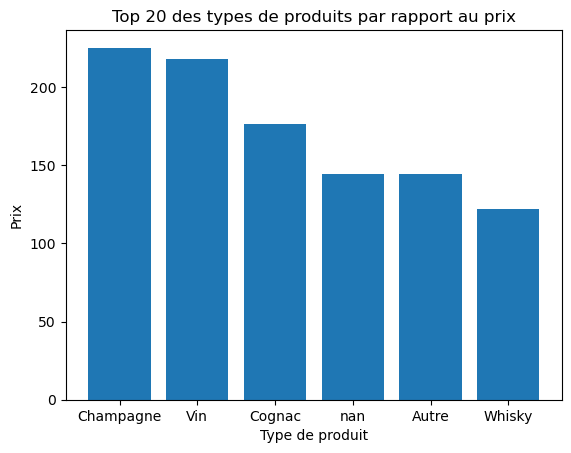

In [8725]:
# Convertir 'product_type' en chaîne de caractères
top_20_product_types['product_type'] = top_20_product_types['product_type'].astype(str)

# Créer un histogramme avec Matplotlib
plt.bar(top_20_product_types['product_type'], top_20_product_types['price'])
plt.title('Top 20 des types de produits par rapport au prix')
plt.xlabel('Type de produit')
plt.ylabel('Prix')

# Afficher le graphique
plt.show()

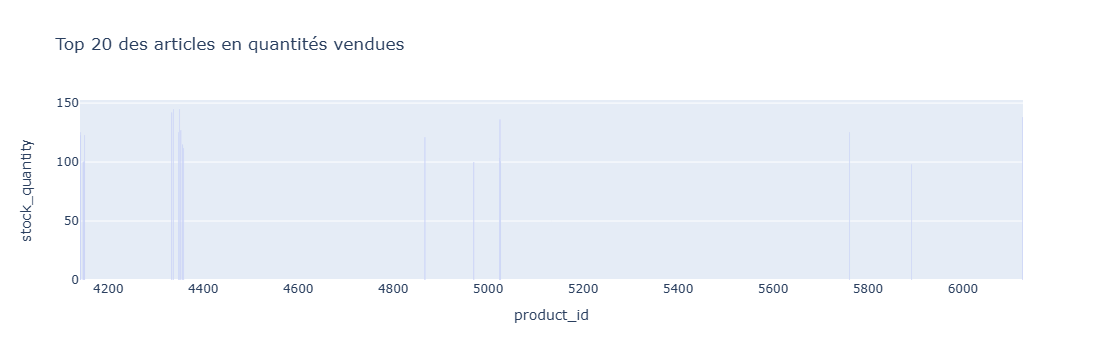

In [8726]:
# Créer le graphique en barres
fig = px.bar(top_20_articles, x='product_id', y='stock_quantity', title='Top 20 des articles en quantités vendues')

# Afficher le graphique
fig.show()

In [8727]:
print("Noms de colonnes de df_final_sorted :")
print(df_final_sorted.columns)

Noms de colonnes de df_final_sorted :
Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status',
       'purchase_price', 'stock_status_2', 'id_web', 'sans_correspondance',
       '_merge', 'sku', 'virtual', 'total_sales', 'tax_status', 'post_author',
       'post_date', 'product_type', 'post_title', 'post_status', 'post_name',
       'post_type', 'post_mime_type', 'respecte_la_regle', 'outliers',
       'CA_par_article_web', 'CA_par_article', 'part_CA'],
      dtype='object')


In [8728]:
#############################
# Calculer le 20 / 80 en stock #
#############################
# Trier le DataFrame par 'stock_quantity' dans l'ordre décroissant
#df_final = df_final.sort_values('stock_quantity', ascending=False)

# Calculer le stock total
stock_total = df_final_sorted['stock_quantity'].sum()

# Calculer la part du stock de chaque ligne et créer une nouvelle colonne
df_final_sorted['part_stock'] = df_final_sorted['stock_quantity'] / stock_total

# Calculer la somme cumulative de la colonne 'part_stock' et créer une nouvelle colonne
df_final_sorted['stock_quantity'] = df_final_sorted['part_stock'].cumsum()*100

# Trouver le premier article où la somme cumulative dépasse 80%
index_80_stock = df_final_sorted[df_final['stock_quantity'] > 0.8].index[0]

# Calculer le nombre d'articles qui représentent 80% du stock
nb_articles_80_stock = df_final_sorted.iloc[:index_80_stock].shape[0]

print("Le nombre d'articles qui représentent 80% du stock est :", nb_articles_80_stock)

nb_total_articles = len(df_final_sorted)

# Calculer la proportion d'articles qui représentent 80% du stock
proportion_articles_80_stock = nb_articles_80_stock / nb_total_articles * 100

print(f"La proportion d'articles qui représentent 80% du stock par rapport au catalogue est : {proportion_articles_80_stock:.2f}%")


Le nombre d'articles qui représentent 80% du stock est : 471
La proportion d'articles qui représentent 80% du stock par rapport au catalogue est : 47.82%


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

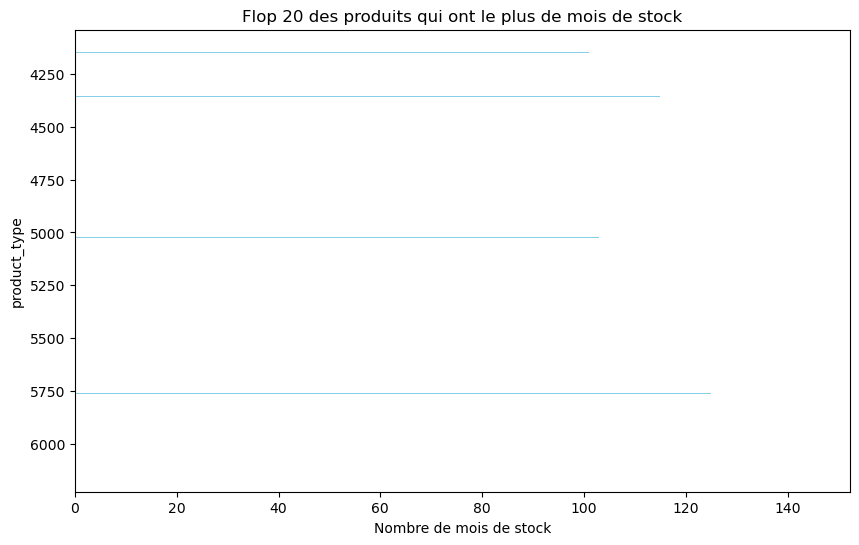

In [8729]:
######################################
# Calcule le nombre de mois de stock #
######################################

# Création de la colonne Rotation de stock
## Calculer la moyenne des stocks
average_stock = df_erp['stock_quantity'].mean()

## Ajouter la colonne 'average_stock' au dataframe
df_erp['average_stock'] = average_stock

## Créer la colonne de rotation des stocks
df_erp['stock_rotation'] = df_erp['purchase_price'] / df_erp['average_stock']

# Remplacement des "inf" par 0
df_erp = df_erp.replace([np.inf, -np.inf], 0)

# Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge
df_erp_sorted = df_erp.sort_values('stock_rotation', ascending=False)

# Graphique en barre du flop 20 des produits qui ont le plus de mois de stock

# Trier le dataframe dans l'ordre décroissant du nombre de mois de stock
df_erp_sorted = df_erp.sort_values('stock_quantity', ascending=False)

# Sélectionner le flop 20 des produits
flop_20_products = df_erp_sorted.head(20)

# Créer le graphique en barres
plt.figure(figsize=(10, 6))
plt.barh(flop_20_products['product_id'], flop_20_products['stock_quantity'], color='skyblue')
plt.xlabel('Nombre de mois de stock')
plt.ylabel('product_type')
plt.title('Flop 20 des produits qui ont le plus de mois de stock')
plt.gca().invert_yaxis()  # Inverser l'axe des y pour avoir le produit avec le plus de mois de stock en haut
plt.show()

In [8730]:
####################################
# Valorisation des stocks en euros #
####################################

# Création de la colonne Valorisation des stocks en euros
# Créer une colonne pour la valorisation des stocks en euros
df_erp['valorisation_stock_euros'] = df_erp['stock_quantity'] * df_erp['price']

# Calculer la somme de la colonne "Valorisation_stock_euros"
somme_valorisation = df_erp['valorisation_stock_euros'].sum()
print("La somme de la colonne 'Valorisation_stock_euros' est : {:.2f}".format(somme_valorisation))


La somme de la colonne 'Valorisation_stock_euros' est : 531628.80


In [8731]:
# Fusionner df_erp et df_final sur 'product_id'
df_merge = pd.merge(df_erp, df_final, on='product_id')

# Assurez-vous que les valeurs de vente mensuelles ne sont pas nulles pour éviter la division par zéro
df_merge['total_sales'] = df_merge['total_sales'].replace(0, np.nan)

# Calculer le nombre de mois de stock en divisant la valorisation du stock en euros par le produit de la quantité de vente mensuelle et le prix
df_merge['stock_months'] = df_merge['valorisation_stock_euros'] / (df_merge['total_sales'] * df_final['price'])

# Afficher le DataFrame
print(df_merge)


     product_id  onsale_web_x  price_x  stock_quantity_x stock_status_x  \
0          3847             1     24.2                16        instock   
1          3849             1     34.3                10        instock   
2          3850             1     20.8                 0     outofstock   
3          4032             1     14.1                26        instock   
4          4039             1     46.0                 3     outofstock   
..          ...           ...      ...               ...            ...   
980        7203             0     45.0                30        instock   
981        7204             0     45.0                 9        instock   
982        7204             0     45.0                 9        instock   
983        7204             0     45.0                 9        instock   
984        7338             1     16.3                40        instock   

     purchase_price_x stock_status_2_x  z_score  average_stock  \
0               12.88          in

In [8732]:
# Afficher les noms de colonnes de df_erp
print("Noms de colonnes de df_erp :")
print(df_erp.columns)

# Afficher les noms de colonnes de df_liaison
print("Noms de colonnes de df_liaison :")
print(df_liaison.columns)

Noms de colonnes de df_erp :
Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status',
       'purchase_price', 'stock_status_2', 'z_score', 'average_stock',
       'stock_rotation', 'valorisation_stock_euros'],
      dtype='object')
Noms de colonnes de df_liaison :
Index(['id_web', 'product_id', 'sans_correspondance'], dtype='object')


In [8733]:
# Calculer les ventes mensuelles en euros
df_merge['monthly_sales_euros'] = df_merge['total_sales'] * df_erp['price']

# Calculer le nombre de mois de stock en divisant la valorisation du stock en euros par les ventes mensuelles en euros
df_merge['stock_months'] = df_merge['valorisation_stock_euros'] / df_merge['monthly_sales_euros']

# Afficher le DataFrame
print(df_merge)

     product_id  onsale_web_x  price_x  stock_quantity_x stock_status_x  \
0          3847             1     24.2                16        instock   
1          3849             1     34.3                10        instock   
2          3850             1     20.8                 0     outofstock   
3          4032             1     14.1                26        instock   
4          4039             1     46.0                 3     outofstock   
..          ...           ...      ...               ...            ...   
980        7203             0     45.0                30        instock   
981        7204             0     45.0                 9        instock   
982        7204             0     45.0                 9        instock   
983        7204             0     45.0                 9        instock   
984        7338             1     16.3                40        instock   

     purchase_price_x stock_status_2_x  z_score  average_stock  \
0               12.88          in

In [8734]:
#df_merge['stock_months'] = df_merge['valorisation_stock_euros'] / df_final['monthly_sales_euros']

In [8735]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity

# Calculer la somme de la colonne "stock_quantity"
somme_stock = df_erp['stock_quantity'].sum()
print("La somme de la colonne 'stock_quantity' est :", somme_stock)

La somme de la colonne 'stock_quantity' est : 17811


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [8736]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT
# Créer une colonne pour le prix HT
df_final['prix_HT'] = df_final['price'] / 1.20
#Création de la colonne Taux de marge
# Créer une colonne pour le taux de marge
df_final['Taux_de_marge'] = (df_final['prix_HT'] - df_final['purchase_price']) / df_final['prix_HT']
#Afficher le prix minimum de la colonne "taux_marge"
min_taux_marge = df_final['Taux_de_marge'].min()
print("Le taux de marge minimum est :", min_taux_marge)

#Afficher le prix maximum de la colonne "taux_marge"
max_taux_marge = df_final['Taux_de_marge'].max()
print("Le taux de marge maximum est :", max_taux_marge)

Le taux de marge minimum est : -6.3498814229249
Le taux de marge maximum est : 1.651


In [8737]:
#affichage de la ligne avec un taux de marge inférieur à 0
df_negative_marge = df_final[df_final['Taux_de_marge'] < 0]
print(df_negative_marge)

     product_id  onsale_web  price  stock_quantity stock_status  \
129        6324           0  92.00              18      instock   
128        6324           0  92.00              18      instock   
279        7196           0  31.00              55      instock   
278        7196           0  31.00              55      instock   
474        4355           1  12.65              97      instock   
127        6324           0  92.00              18      instock   
277        7196           0  31.00              55      instock   

     purchase_price stock_status_2 id_web  sans_correspondance _merge  \
129           99.00        instock    NaN                 True   both   
128           99.00        instock    NaN                 True   both   
279           31.20        instock    NaN                 True   both   
278           31.20        instock    NaN                 True   both   
474           77.48        instock  12589                False   both   
127           99.00      

In [8738]:
# Calculer le taux de marge maximum
max_marge = df_final['Taux_de_marge'].max()

print("Le taux de marge maximum est :", max_marge)

Le taux de marge maximum est : 1.651


In [8739]:
#création d'un dataframe avec les taux positifs
df_positive_marge = df_final[df_final['Taux_de_marge'] > 0]
#Afficher le prix minimum de la colonne "taux_marge"
min_taux_marge =df_positive_marge['Taux_de_marge'].min()
print("Le taux de marge minimum est :", min_taux_marge)

#Afficher le prix maximum de la colonne "taux_marge"
max_taux_marge = df_positive_marge['Taux_de_marge'].max()
print("Le taux de marge maximum est :", max_taux_marge)

Le taux de marge minimum est : 0.22778625954198473
Le taux de marge maximum est : 1.651


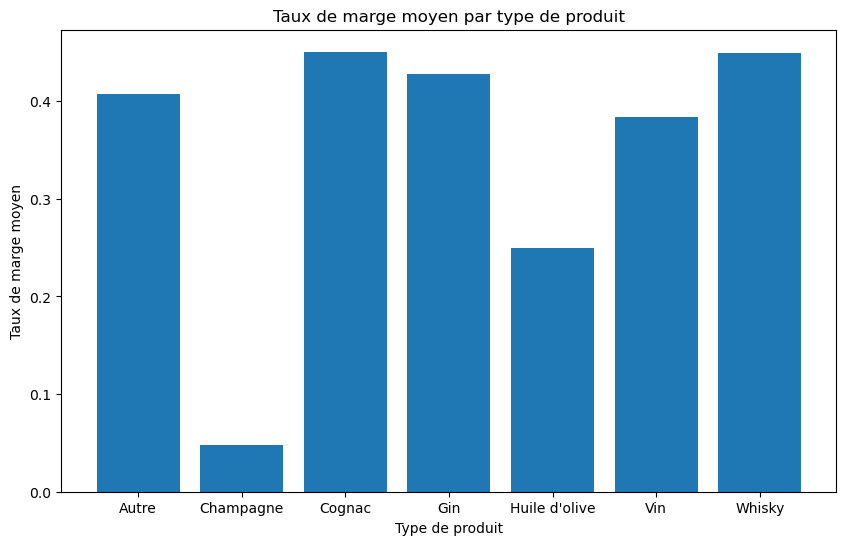

In [8740]:
#création d'un dataframe avec le taux de marge moyen par type de produit
df_marge_moyenne = df_final.groupby('product_type')['Taux_de_marge'].mean().reset_index()
#Affichage dans un graphique du taux de marge par type de produit
import matplotlib.pyplot as plt

# Création du graphique
plt.figure(figsize=(10,6))
plt.bar(df_marge_moyenne['product_type'], df_marge_moyenne['Taux_de_marge'])

# Ajout des titres et des labels
plt.title('Taux de marge moyen par type de produit')
plt.xlabel('Type de produit')
plt.ylabel('Taux de marge moyen')

# Affichage du graphique
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

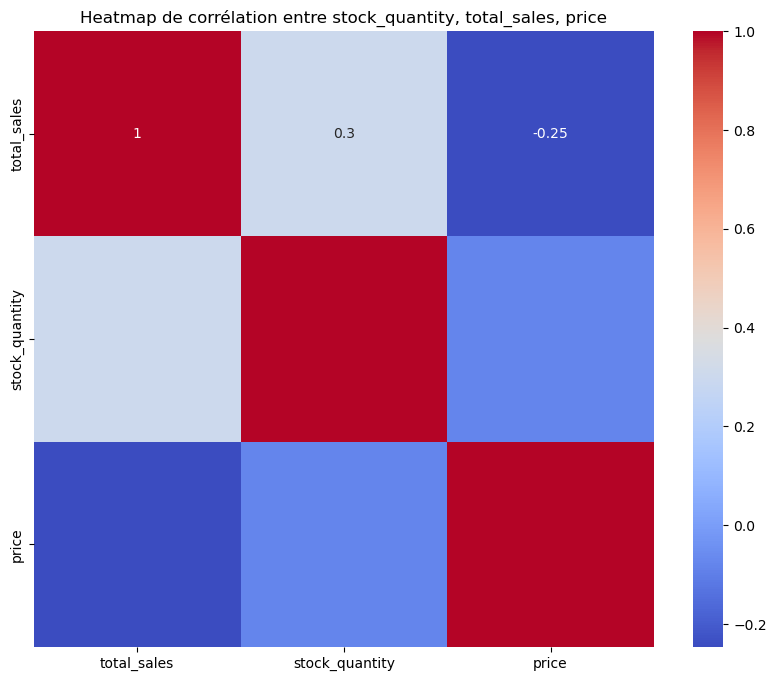

In [8741]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn
import seaborn as sns
# Sélection des colonnes pertinentes
df_subset = df_final[['total_sales', 'stock_quantity', 'price',]]

# Calcul de la matrice de corrélation
corr_matrix = df_subset.corr()

# Création de la heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Ajout des titres et des labels
plt.title('Heatmap de corrélation entre stock_quantity, total_sales, price')
plt.show()

In [8736]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT
# Créer une colonne pour le prix HT
df_final['prix_HT'] = df_final['price'] / 1.20
#Création de la colonne Taux de marge
# Créer une colonne pour le taux de marge
df_final['Taux_de_marge'] = (df_final['prix_HT'] - df_final['purchase_price']) / df_final['prix_HT']
#Afficher le prix minimum de la colonne "taux_marge"
min_taux_marge = df_final['Taux_de_marge'].min()
print("Le taux de marge minimum est :", min_taux_marge)

#Afficher le prix maximum de la colonne "taux_marge"
max_taux_marge = df_final['Taux_de_marge'].max()
print("Le taux de marge maximum est :", max_taux_marge)

Le taux de marge minimum est : -6.3498814229249
Le taux de marge maximum est : 1.651


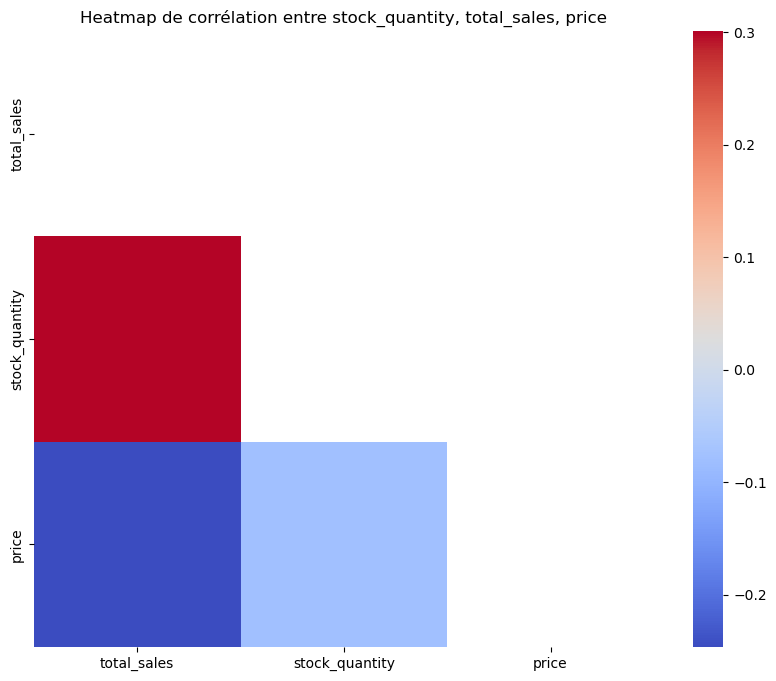

In [8742]:
#on peut également créer un mask pour n'afficher qu'une demi heatmap
# Création d'un masque pour la partie supérieure du triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Création de la heatmap avec le masque
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm')

# Ajout des titres et des labels
plt.title('Heatmap de corrélation entre stock_quantity, total_sales, price')
plt.show()

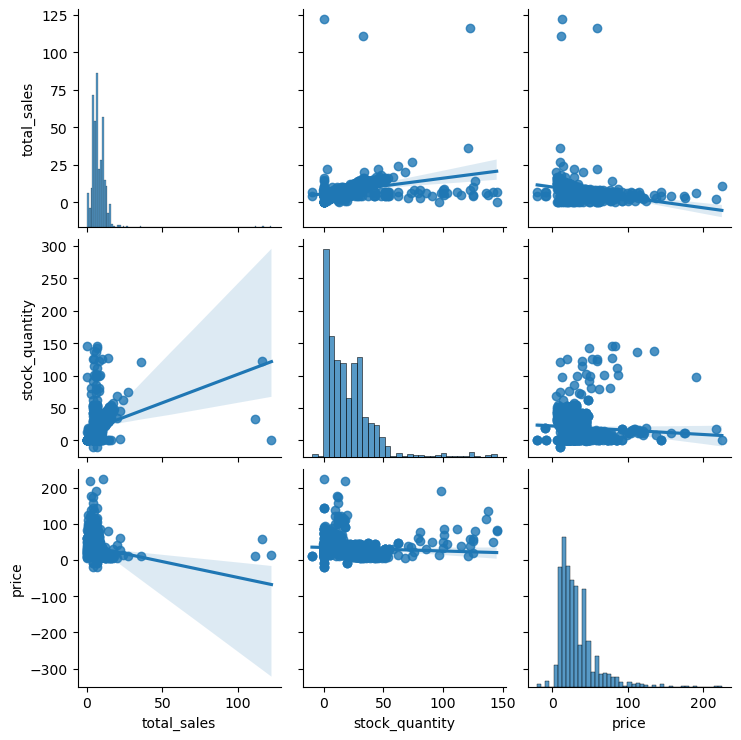

In [8743]:
# Importation de seaborn
import seaborn as sns

# Création d'un pairplot avec une ligne de régression
sns.pairplot(df_subset, kind="reg")

# Affichage du graphique
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [8744]:
#Que peut-on conclure des correlations ?